In [3]:
#Simulate Events
from simulate_noise import simulate_noise
import numpy as np


In [ ]:

NoiseModel = 'NoiseModel_Full_11012023.npz'
NumEvents = np.load(NoiseModel)['TotalEvents']

Waveform_Array, PSD_Array = simulate_noise.simulateMultipleEvents(NoiseModel,'SimulatedEvents_500_11082023_hard.npz',500,easy_sim=False)

In [4]:
#load data from one simulated file at first
files = ['SimulatedEvents_500_11062023_hard.npz','SimulatedEvents_500_11082023_hard.npz']

Sim_Data = np.load(files[0])
Waveform_Array = Sim_Data['Waveforms']
PSD_Array = Sim_Data['PSDs']

/home/matt/Documents/ICEBERG/New_Code_20230906/ICEBERG_Noise_Modeling-main/src/plotter.py:115: RuntimeWarning: divide by zero encountered in log
  ax2[tpc][plane].pcolormesh(freq,range(plotter.maxwires),np.log(Sorted_PSD[tpc][plane]),cmap = cmap,shading='gouraud',vmin = -14, vmax = -5)
/home/matt/Documents/ICEBERG/New_Code_20230906/ICEBERG_Noise_Modeling-main/src/plotter.py:116: RuntimeWarning: divide by zero encountered in log
  fig2.colorbar(ax2[tpc][plane].pcolormesh(freq,range(plotter.maxwires),np.log(Sorted_PSD[tpc][plane]),cmap = cmap,shading='gouraud',vmin = -14, vmax = -5))


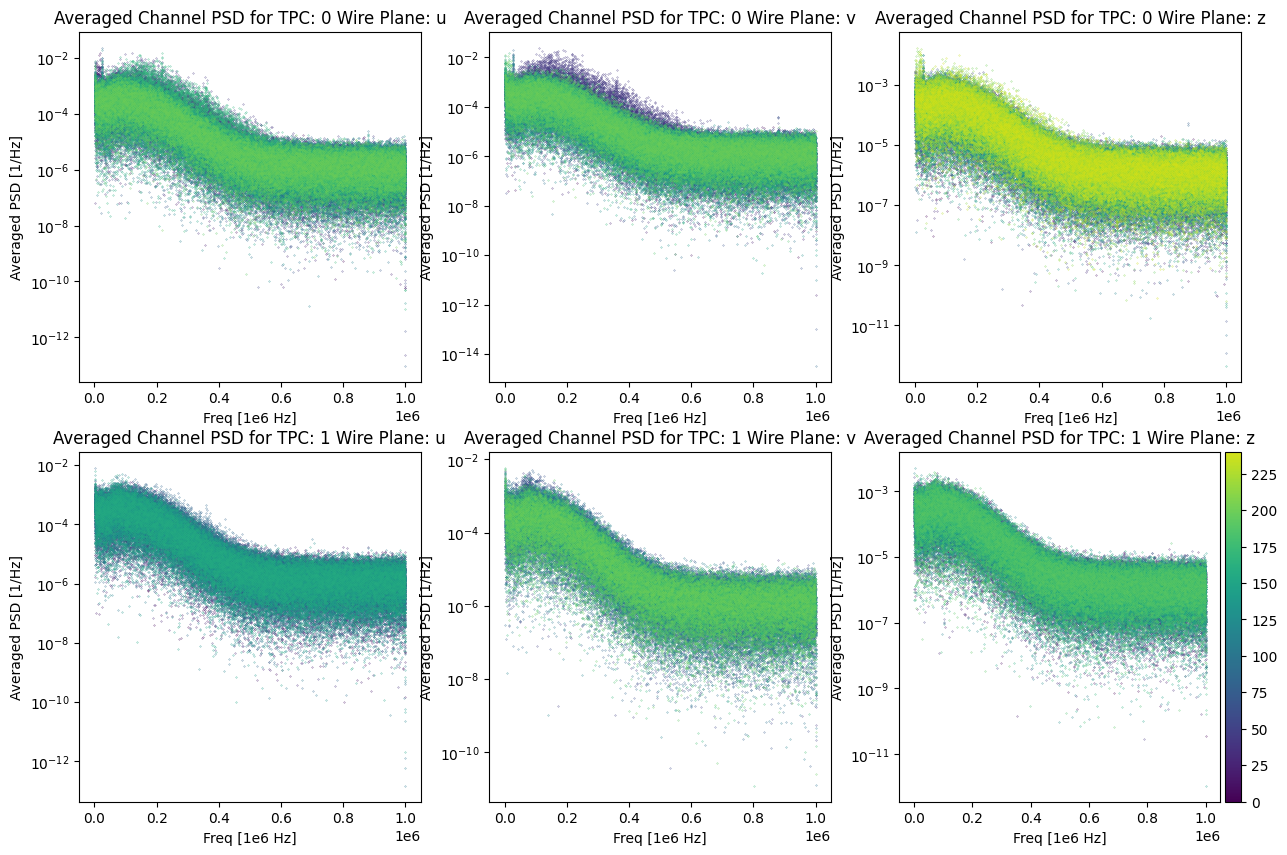

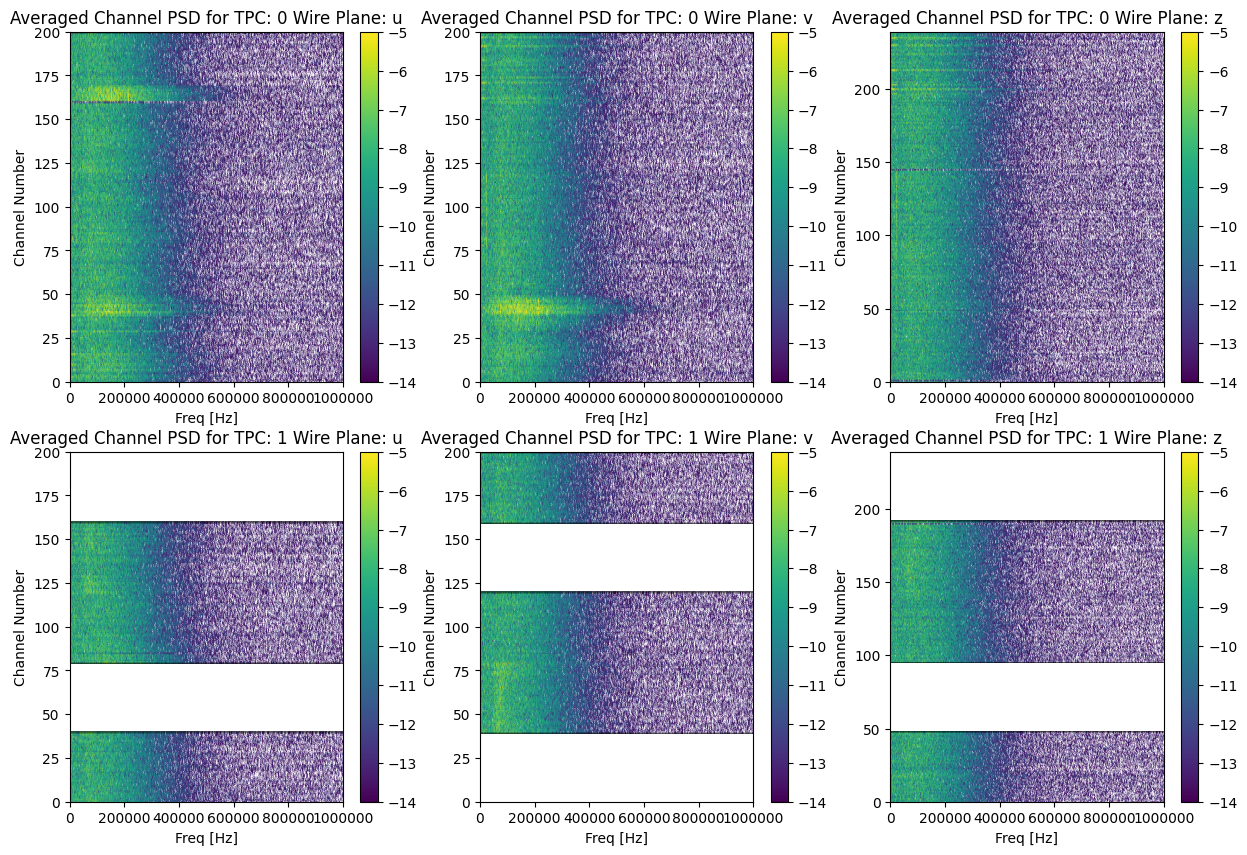

In [5]:
#Test out simulated events

#Look at Waveform and PSD from one event
from plotter import plotter
plotter.HistAvgPSDbyPlane(PSD_Array[0])



In [6]:
#Look at avg PSD and correlations for all events
#for i in range(1,len(files)):
#    Sim_Data = np.load(files[i])
#    np.concatenate((Waveform_Array,Sim_Data['Waveforms']),axis=0)
#    np.concatenate((PSD_Array,Sim_Data['PSDs']),axis=0)

numchannels = simulate_noise.numchannels
Avg_PSD = np.zeros((numchannels,simulate_noise.PSD_length))
for i in range(len(Waveform_Array)):
    Avg_PSD += PSD_Array[i]
Avg_PSD /= len(Waveform_Array)
BothLive=np.ones((numchannels,numchannels))

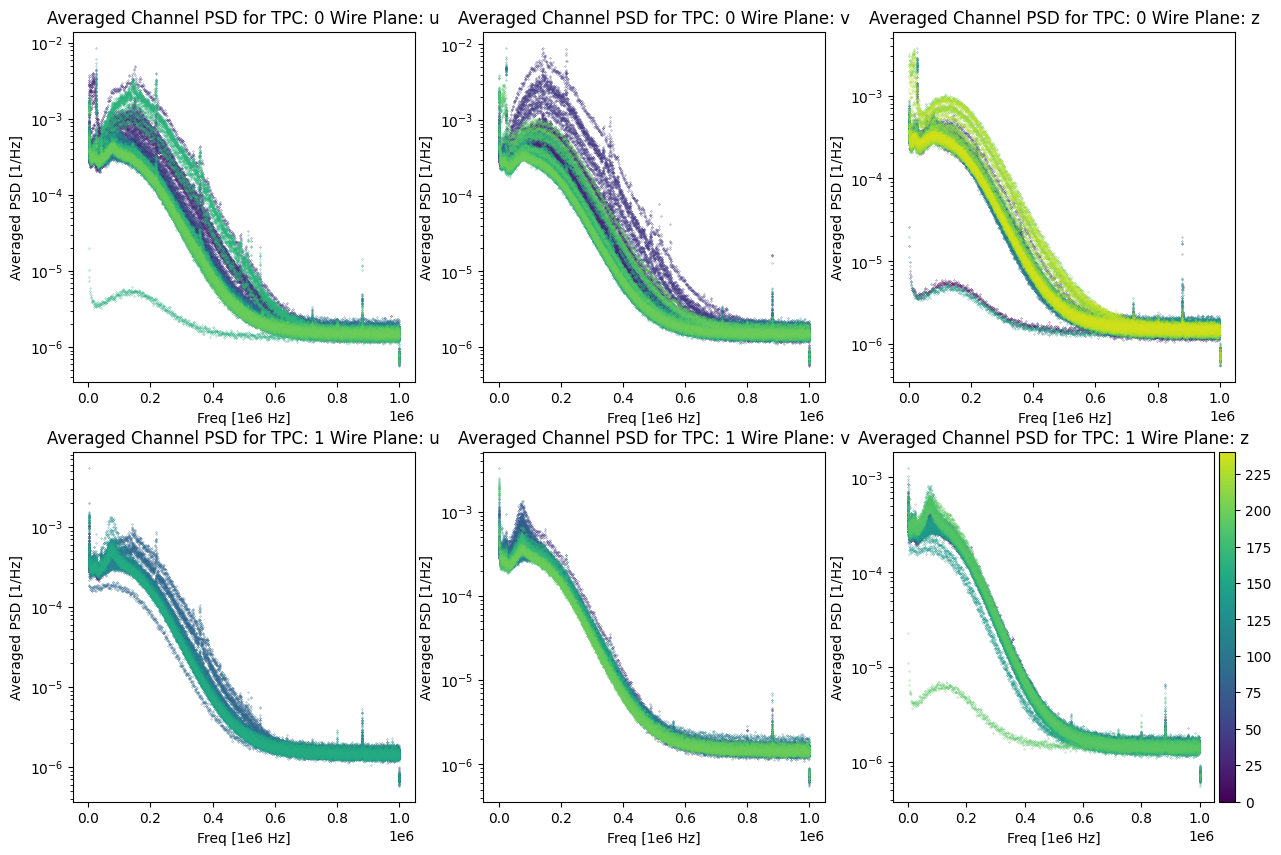

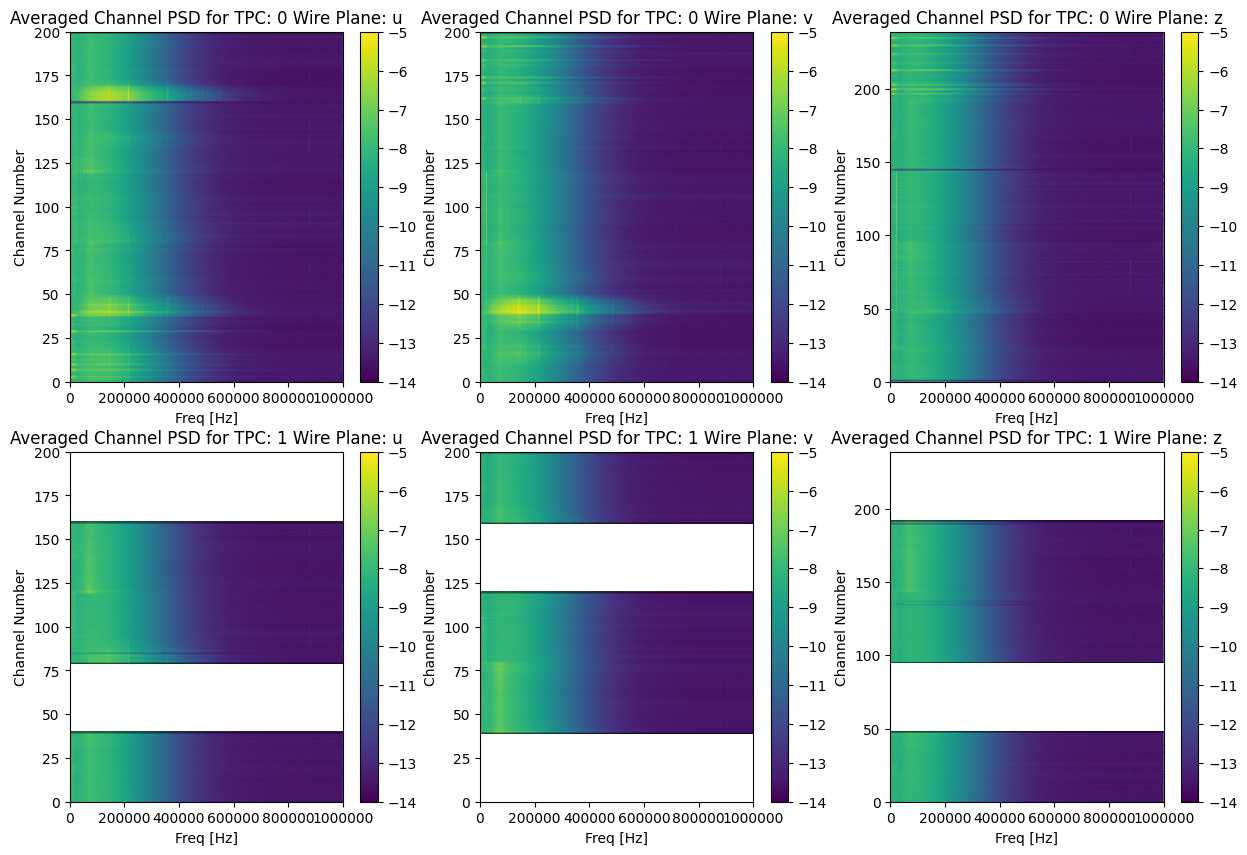

In [7]:
plotter.HistAvgPSDbyPlane(Avg_PSD)

In [8]:
#Look at correlations for simulated events
numchannels = plotter.numchannels
rCorr = np.zeros((numchannels,numchannels))
for i in range(len(Waveform_Array)):
    rCorr += np.corrcoef(Waveform_Array[i])
rCorr /= len(Waveform_Array)
BothLive=np.ones((numchannels,numchannels))

/home/matt/miniconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/matt/miniconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


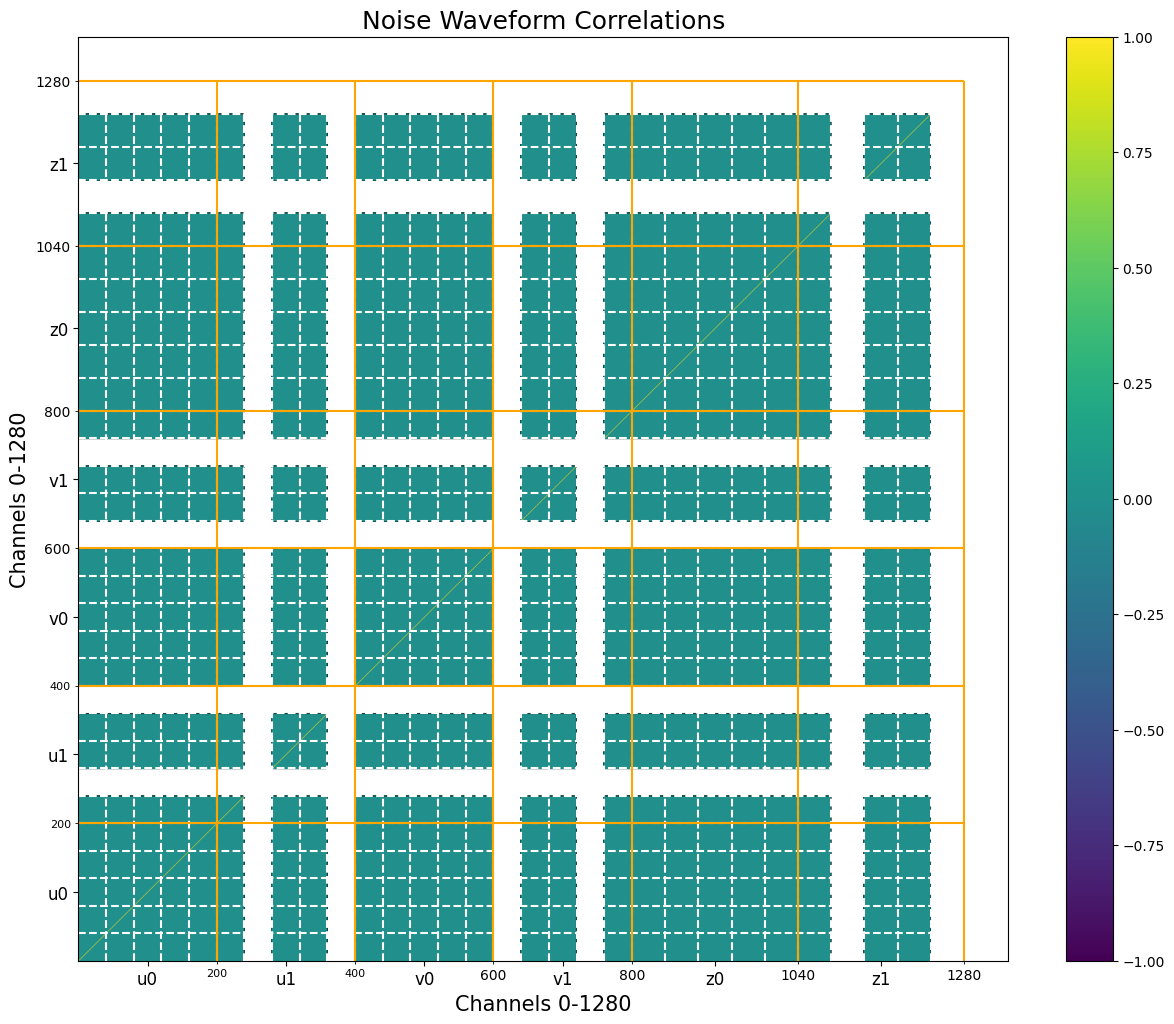

In [9]:
plotter.plotrCorr(rCorr,BothLive)

In [ ]:
#In a more automated way, process the MC events:
from myprocessor import myprocessor as myp
from plotter import plotter as plotter
import numpy as np

BothLive = np.load('NoiseModelTest09202023.npz')['BothLive']
filelist = ['SimulatedEvents_500_11062023_hard.npz','SimulatedEvents_500_11082023_hard.npz']

PSD, rCorr, CorrBand, TotalEvents = myp.multiMCprocess(filelist,BothLive)

In [ ]:
plotter.HistAvgPSDbyPlane(PSD)
plotter.plotrCorr(rCorr,BothLive)